In [1]:
%pylab inline
import pandas
import seaborn
from urllib.request import Request, urlopen
import json

def get_json(url):
    hdr = { 
        'X-TBA-Auth-Key' : '9l2oKd2IBt1TrlCxGhAl6pa6z06rNGcbDQrQ0EXFcMa7eCtPBdltgM5Tc69nwTOo', 
        'User-Agent': 'Mozilla /5.0 (Compatible MSIE 9.0;Windows NT 6.1;WOW64; Trident/5.0)' 
    }
    req = Request(url=url, headers=hdr)
    response = urlopen(req)
    json_text = json.loads(response.read())
    response.close()
    return json_text

Populating the interactive namespace from numpy and matplotlib


In [2]:
json_data = get_json('https://www.thebluealliance.com/api/v3/event/2018nysu/matches')

In [3]:
df = pandas.io.json.json_normalize(data=json_data, meta=[['score_breakdown', 'blue'], ['alliances', 'red']], sep='.')

In [4]:
df['actual_time'] = pandas.to_datetime(df['actual_time'], unit='s')
df.drop('alliances.blue.dq_team_keys', axis=1, inplace=True)
df.drop('alliances.blue.surrogate_team_keys', axis=1, inplace=True)
df.drop('alliances.red.dq_team_keys', axis=1, inplace=True)
df.drop('alliances.red.surrogate_team_keys', axis=1, inplace=True)
df.drop('time', axis=1, inplace=True)
df.drop('videos', axis=1, inplace=True)
df.drop('post_result_time', axis=1, inplace=True)
df.drop('predicted_time', axis=1, inplace=True)
list(df)

['actual_time',
 'alliances.blue.score',
 'alliances.blue.team_keys',
 'alliances.red.score',
 'alliances.red.team_keys',
 'comp_level',
 'event_key',
 'key',
 'match_number',
 'score_breakdown.blue.adjustPoints',
 'score_breakdown.blue.autoOwnershipPoints',
 'score_breakdown.blue.autoPoints',
 'score_breakdown.blue.autoQuestRankingPoint',
 'score_breakdown.blue.autoRobot1',
 'score_breakdown.blue.autoRobot2',
 'score_breakdown.blue.autoRobot3',
 'score_breakdown.blue.autoRunPoints',
 'score_breakdown.blue.autoScaleOwnershipSec',
 'score_breakdown.blue.autoSwitchAtZero',
 'score_breakdown.blue.autoSwitchOwnershipSec',
 'score_breakdown.blue.endgamePoints',
 'score_breakdown.blue.endgameRobot1',
 'score_breakdown.blue.endgameRobot2',
 'score_breakdown.blue.endgameRobot3',
 'score_breakdown.blue.faceTheBossRankingPoint',
 'score_breakdown.blue.foulCount',
 'score_breakdown.blue.foulPoints',
 'score_breakdown.blue.rp',
 'score_breakdown.blue.tba_gameData',
 'score_breakdown.blue.techFoulC

## Auto Scores of Alliances Qualification Matches Hudson Valley 2018
Most teams only decided to cross the auton line, some decided to get ownership points

()

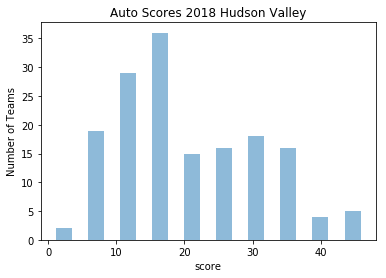

In [5]:
qm = df[df['comp_level'] == 'qm']
auto_scores = [qm['score_breakdown.blue.autoPoints'], qm['score_breakdown.red.autoPoints']]
result = pandas.concat(auto_scores)
hist(result, rwidth=.5, alpha=0.5, bins=10)
title('Auto Scores 2018 Hudson Valley')
xlabel('score')
ylabel('Number of Teams')
/

In [14]:
# qm.groupby(['actual_time', 'alliances.blue.score', 'alliances.red.score'])